# Glassdoor salary

In [253]:
import pandas as pd   
import numpy as np
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24}) 

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

from sklearn import datasets

In [254]:
ds = pd.read_csv("data.csv")
ds.columns
ds.shape

(1000, 9)

This database has 1000 rows and 9 columns

In [255]:
len(ds)

1000

In [256]:
ds.dtypes

jobTitle     object
gender       object
age           int64
perfEval      int64
edu          object
dept         object
seniority     int64
basePay       int64
bonus         int64
dtype: object

In [257]:
ds.head(8)

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
5,IT,Female,20,5,PhD,Operations,4,70890,10126
6,Graphic Designer,Female,20,5,College,Sales,4,67585,10541
7,Software Engineer,Male,18,4,PhD,Engineering,5,97523,10240


In [258]:
ds.describe()

,age,perfEval,seniority,basePay,bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [259]:
ds.nunique()

jobTitle      10
gender         2
age           48
perfEval       5
edu            4
dept           5
seniority      5
basePay      992
bonus        941
dtype: int64

# Missing Values

In [260]:
print(ds.isnull().sum())

jobTitle     0
gender       0
age          0
perfEval     0
edu          0
dept         0
seniority    0
basePay      0
bonus        0
dtype: int64


As we can see we didn't find any missing values

In [261]:
ds_ms= (ds.isnull().sum() / len(ds)) * 100
ds_ms= ds_ms.drop(ds_ms[ds_ms== 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :ds_ms})
missing_data.head(10)

,Missing Ratio


We note that there are no missing values and cnt might be skewed  

In [262]:
target_variable= "jobTitle"
input_variables = ds.columns[ds.columns!=target_variable]
input_variables

Index(['gender', 'age', 'perfEval', 'edu', 'dept', 'seniority', 'basePay',
       'bonus'],
      dtype='object')

## DQ dimension: COMPLETENESS

In [263]:
countValues = ds.count().sum()
countNull=ds.isnull().sum().sum()
nValues=countValues+countNull

completeness = countValues/nValues
completeness='{0:.1f}%'.format(completeness*100)
print(completeness)

100.0%


For not showing any missing value, it DQ dimension became 100%

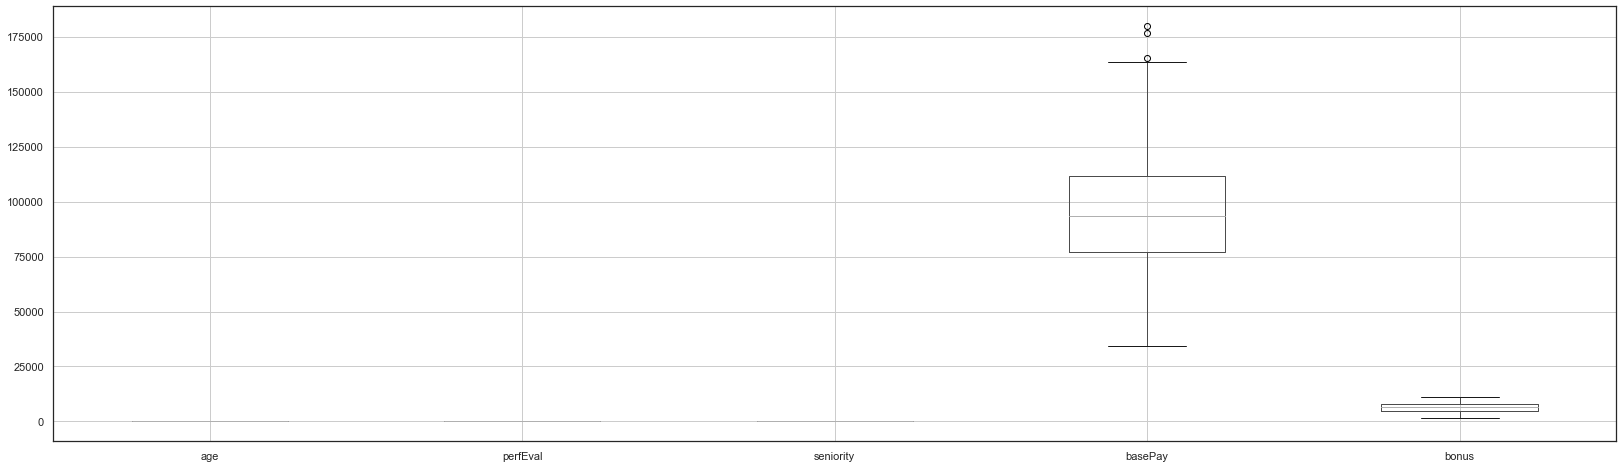

In [264]:
ds[input_variables].boxplot(figsize=(28,8));

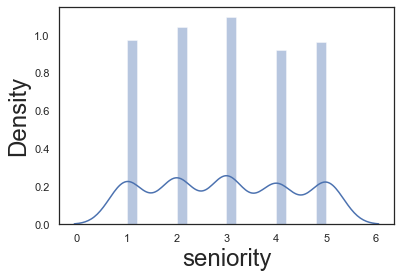

In [265]:
sns.distplot(ds['seniority'], bins=20);

It is visible that an old function with 3 to 5 years has a higher average inside.

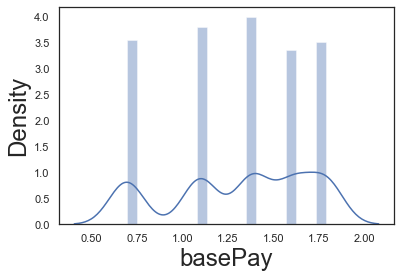

In [266]:
ds['basePay'] = np.log1p(ds['seniority'])
sns.distplot(ds['basePay'], bins=20);

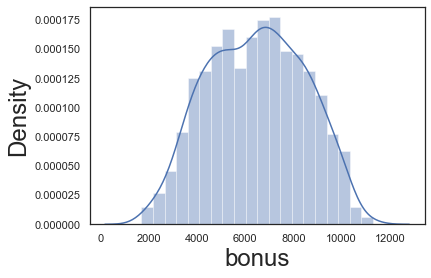

In [267]:
sns.distplot(ds['bonus'], bins=20);

A reduced number of workers have a lower bonus than most are between 5000 and 7500

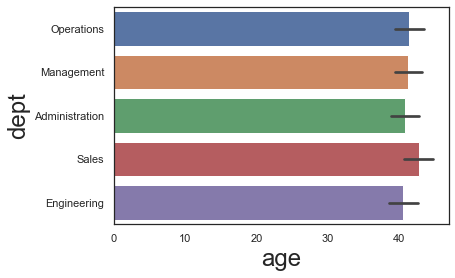

In [268]:
sns.barplot(x=ds['age'],y=ds['dept']);

ds.count()

We noticed that there is a higher number of employees in the sales area over 40 years old. On the other hand, the engs are under 40 years of age

In [269]:
group_jobTite = ds['jobTitle'].value_counts()
group_jobTite.head

<bound method NDFrame.head of Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: jobTitle, dtype: int64>

The marketing area is the one with the most number of employees and the Manager area has a reduced number of employees

In [270]:
group_jobTite.value_counts()

107    2
90     2
118    1
109    1
98     1
96     1
94     1
91     1
Name: jobTitle, dtype: int64

We can see that the most professional in the field of Marketing with a total of 118, and a number of 90 Manager's

In [271]:
#Criando o grafico Scatterplot

<AxesSubplot:xlabel='age', ylabel='bonus'>

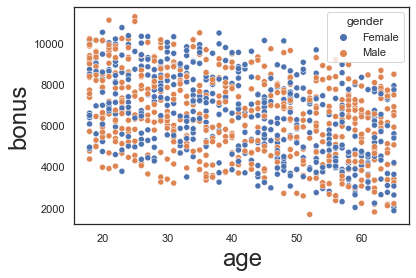

In [283]:
sns.scatterplot(data=ds, x = 'age', y = 'bonus', hue='gender')

There is a very large dispersion of the data, in relation to bonuses, age and gender. But we can notice a periodic centralization for women who have a bonus of 6000 to 7000 with an average age of 30 to 40 years



<AxesSubplot:xlabel='age', ylabel='Count'>

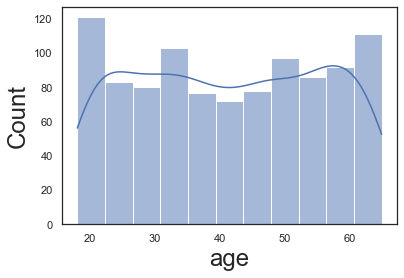

In [273]:
sns.histplot(ds['age'], kde=True)

# Criacao do grafico barplot

<AxesSubplot:xlabel='dept', ylabel='bonus'>

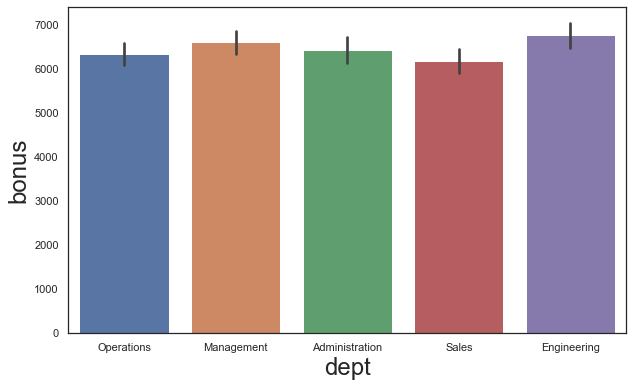

In [274]:
f, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="dept", y="bonus",data=ds)

<AxesSubplot:xlabel='jobTitle', ylabel='seniority'>

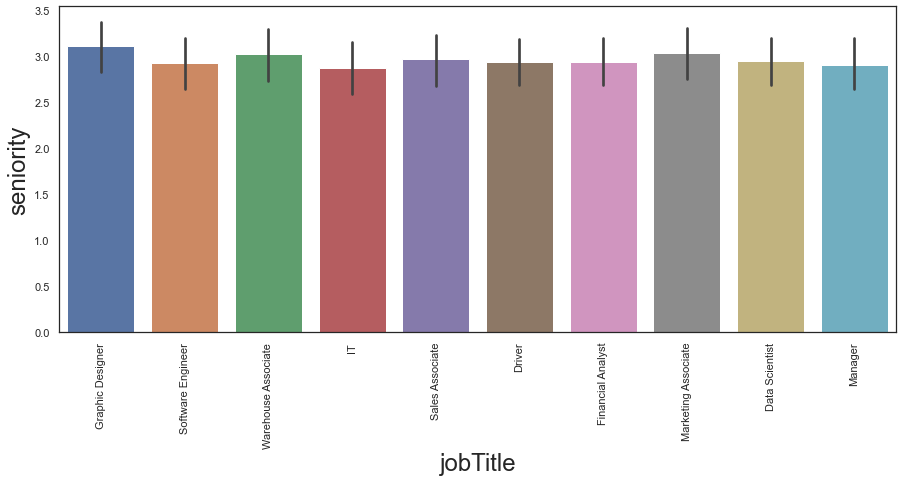

In [275]:
f, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation='90')
sns.barplot(x="jobTitle", y="seniority",data=ds)

<AxesSubplot:xlabel='jobTitle', ylabel='basePay'>

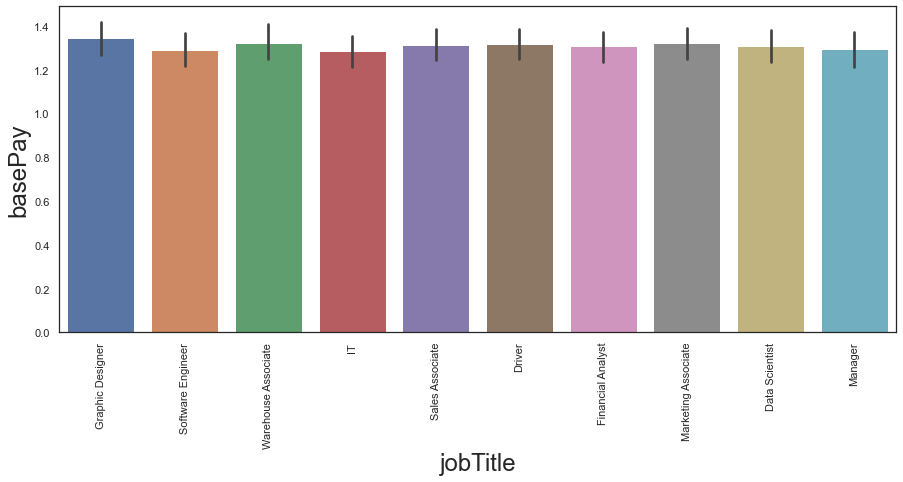

In [276]:
f, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation='90')
sns.barplot(x="jobTitle", y="basePay",data=ds)

<AxesSubplot:xlabel='jobTitle', ylabel='bonus'>

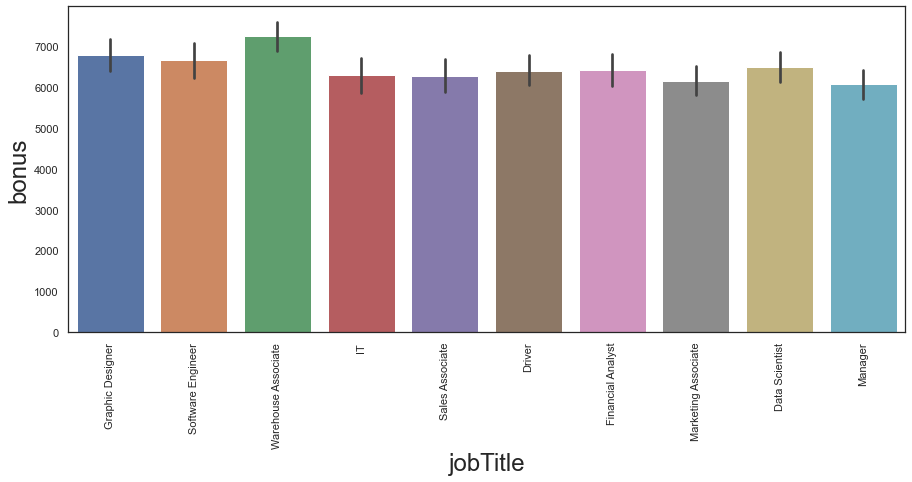

In [277]:
f, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation='90')
sns.barplot(x="jobTitle", y="bonus",data=ds)

# A diferenca dos salarios 

In [278]:
ds['dfPay'] = ds['bonus'] - ds['basePay']
ds.head()

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,dfPay
0,Graphic Designer,Female,18,5,College,Operations,2,1.098612,9938,9936.901388
1,Software Engineer,Male,21,5,College,Management,5,1.791759,11128,11126.208241
2,Warehouse Associate,Female,19,4,PhD,Administration,5,1.791759,9268,9266.208241
3,Software Engineer,Male,20,5,Masters,Sales,4,1.609438,10154,10152.390562
4,Graphic Designer,Male,26,5,Masters,Engineering,5,1.791759,9319,9317.208241


# correlations between attributes

(6.5, -0.5)

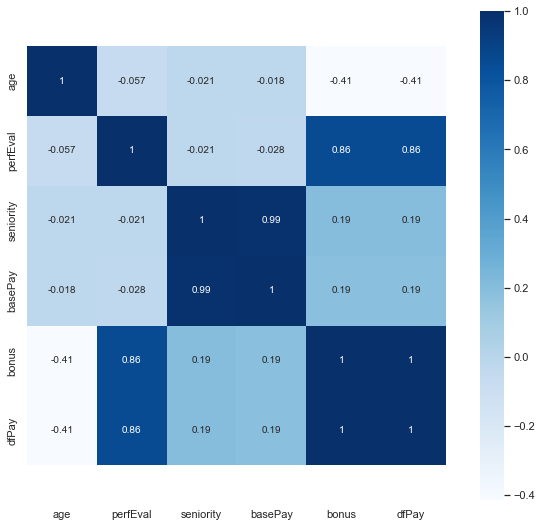

In [279]:
corrmat = ds.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, square=True, cmap="Blues",annot=True);

# these lines are here only to correct a matplotlib bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
#


<Figure size 1080x1080 with 0 Axes>

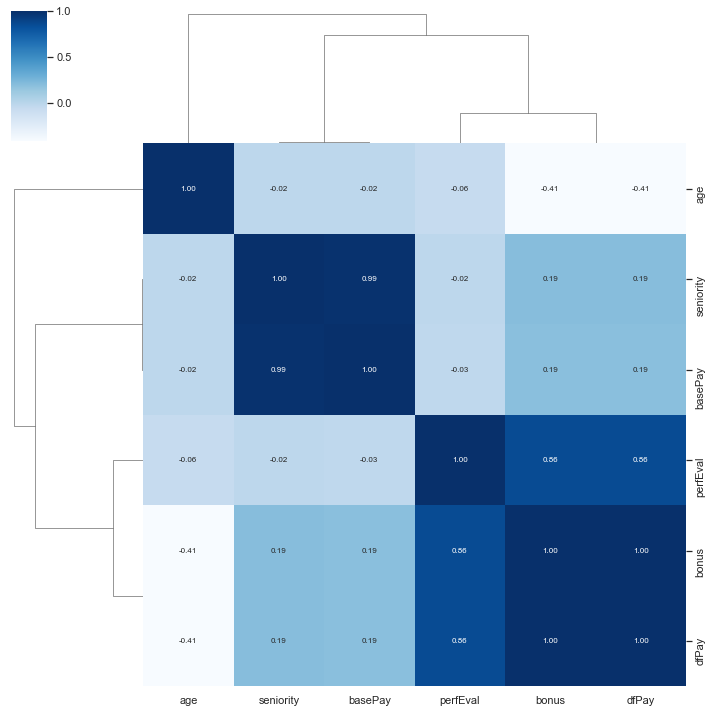

In [284]:
plt.figure(figsize=(15, 15));
sns.clustermap(corrmat,square=True,annot=True,cmap="Blues",annot_kws={"size": 8},fmt='.2f');

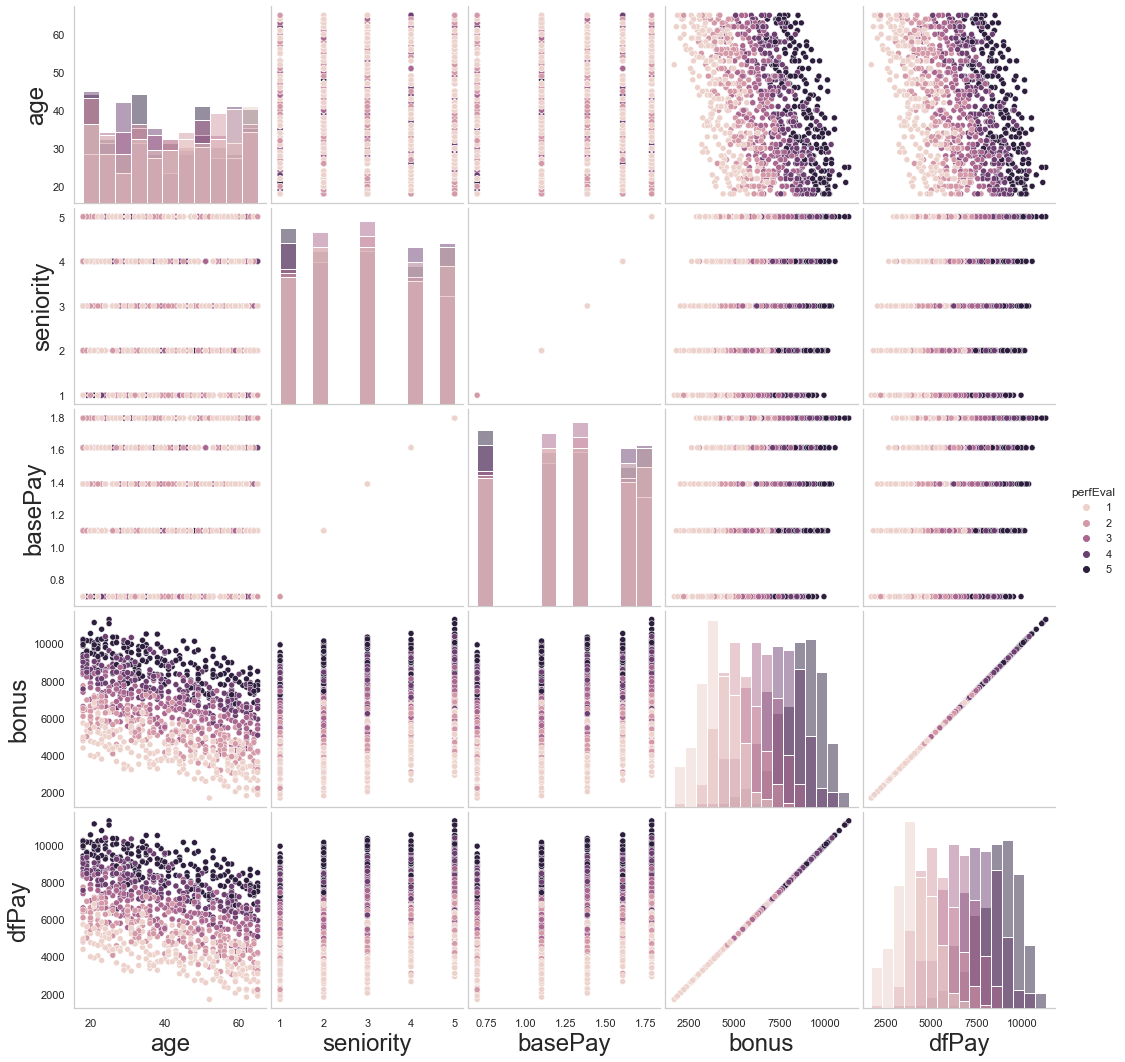

In [285]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(ds, hue="perfEval", size=3, diag_kind="hist");

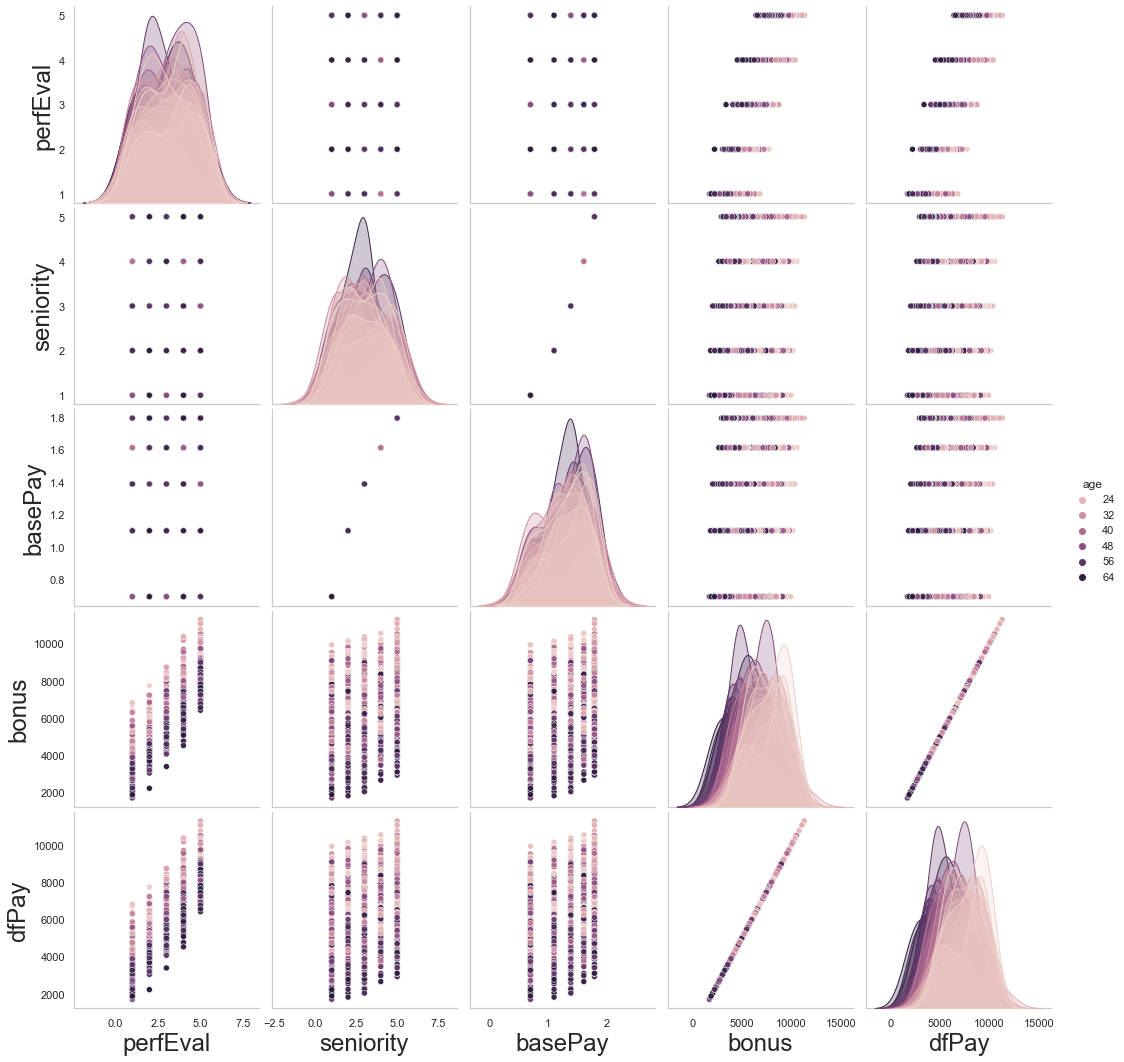

In [286]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(ds, hue="age", size=3, diag_kind="kde");

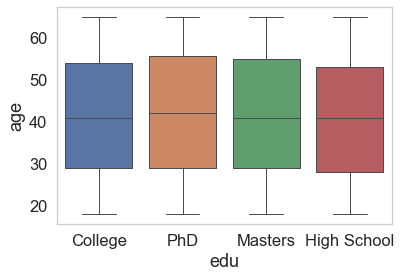

In [287]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(x="edu", y="age", data=ds);

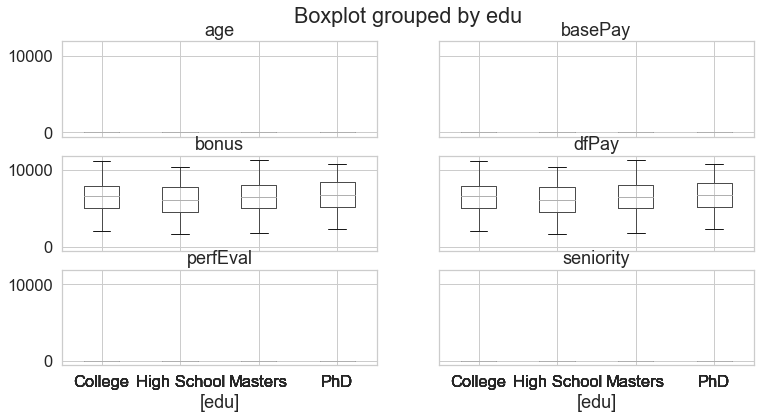

In [288]:
ds.boxplot(by="edu", figsize=(12, 6));

<Figure size 1080x720 with 0 Axes>

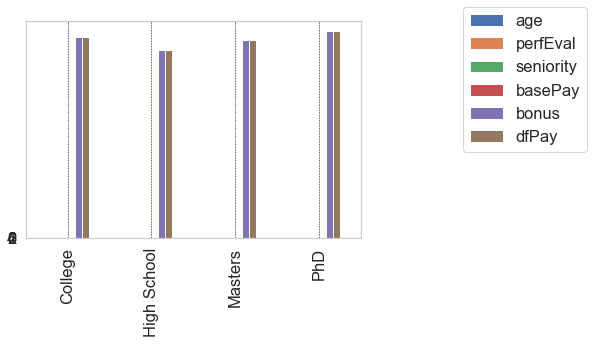

In [289]:
plt.figure(figsize=(15, 10));
ds_gb=ds.groupby(["edu"]).mean();
ds_gb.plot(kind="bar");
plt.grid(color='black', linestyle='--', linewidth=.5);
plt.yticks(np.arange(0, 7, step=2.0));
plt.xlabel("");
plt.legend(loc='upper right',bbox_to_anchor=(1.7, 1.1));

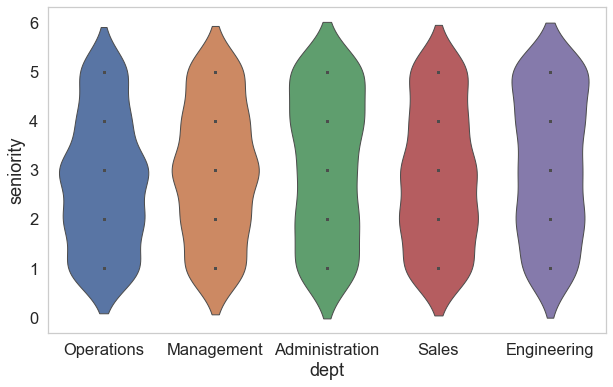

In [290]:
f, ax = plt.subplots(figsize=(10,6))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.violinplot(x="dept", y="seniority", data=ds, inner="points");

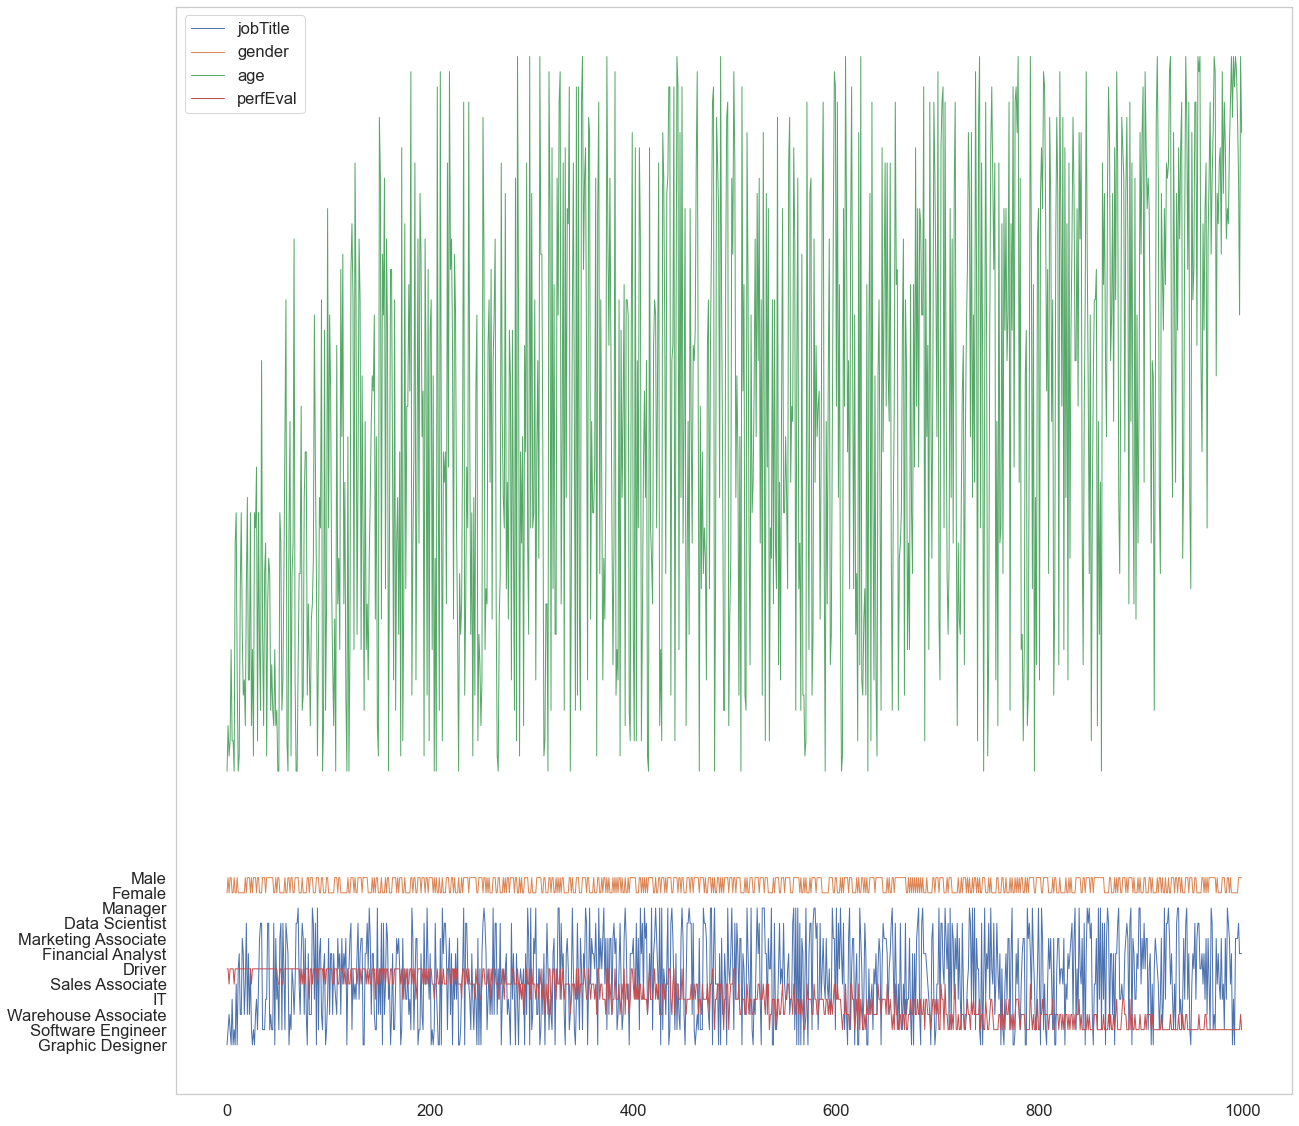

In [291]:
plt.figure(figsize=(20,20))
for feature in ds.columns[0:4]:
    plt.plot(ds[feature], label = feature)
plt.legend(loc='best');